In [10]:
from automata.fa.dfa import DFA
from visual_automata.fa.dfa import VisualDFA
import json
from collections import OrderedDict

In [28]:


jsdata={
    "states":3,
    "letters":["a","b"],
    "t_func":[[0,"a",[0,1]],[0,"b",[0]],[1,"b",[2]]],
    "start":0,
    "final":[1,2]
}
data=json.loads(json.dumps(jsdata),object_pairs_hook=OrderedDict)

dfa_states = 2 ** data["states"]
dfa_letters = data["letters"]
dfa_start = data["start"]
dfa_t_func = []
dfa_final = []
dfa_list = []
q = []

q.append((dfa_start,))

nfa_transitions = {}
dfa_transitions = {}

for transition in data["t_func"]:
    nfa_transitions[(transition[0], transition[1])] = transition[2]

for in_state in q:
    for symbol in dfa_letters:
        if len(in_state) == 1 and (in_state[0], symbol) in nfa_transitions:
            dfa_transitions[(in_state, symbol)] = nfa_transitions[(in_state[0], symbol)]

            if tuple(dfa_transitions[(in_state, symbol)]) not in q:
                q.append(tuple(dfa_transitions[(in_state, symbol)]))
        else:
            dest = []
            f_dest =[]

            for n_state in in_state:
                if (n_state, symbol) in nfa_transitions and nfa_transitions[(n_state, symbol)] not in dest:
                    dest.append(nfa_transitions[(n_state, symbol)])
            
            if dest:
                for d in dest:
                    for value in d:
                        if value not in f_dest:
                            f_dest.append(value)
            
                dfa_transitions[(in_state, symbol)] = f_dest 

                if tuple(f_dest) not in q: 
                    q.append(tuple(f_dest))

for key, value in dfa_transitions.items():
    temp_list = [[key[0], key[1], value]]
    dfa_t_func.extend(temp_list)


for q_state in q:
    for f_state in data["final"]:
        if f_state in q_state:
            dfa_final.append(q_state)

dfa = OrderedDict()
dfa["states"] = dfa_states
dfa["letters"] = dfa_letters
dfa["t_func"] = dfa_t_func
dfa["start"] = dfa_start
dfa["final"] = dfa_final

#output_file = open('output2.json', 'w+')
#print(json.dumps(dfa, indent=4))
dfa_states=[]
for i in range(dfa["states"]):
   dfa_states.append(i)
#json.dump(dfa, output_file, separators = (',\t' , ':'))     
print(set(dfa["letters"]))

{'a', 'b'}


In [27]:
dfa = VisualDFA(
    states=set(dfa_states),
    input_symbols=set(dfa["letters"]),
    transitions={
        "0": {"a": "3", "b": "q1"},
        "1": {"a": "3", "b": "q2"},
        "2": {"a": "3", "b": "q2"},
        "3": {"a": "4", "b": "q1"},
        "4": {"a": "4", "b": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

MissingStateError: transition start state 0 is missing

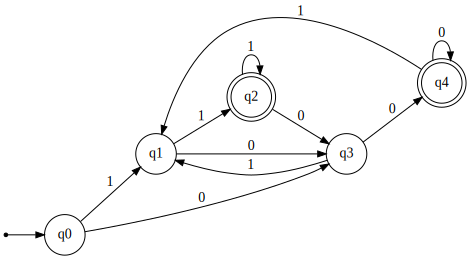

In [8]:
dfa.show_diagram()